<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/SimpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗",
      "青蛙", "馬," "船", "卡車"]

青蛙


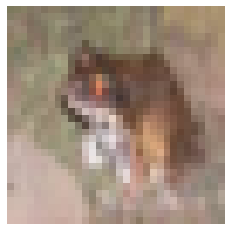

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,49999)
plt.axis("off")
# trains[0] --> 飛機
# XX --> trans[ [0] ]
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [5]:
# 資料預處理
# 1.題目預處理(Normalize)
###### MLP ######
# Keras在準備隨機那組weights, 跟Normalize的圖片比較搭
# 1.第一種方式: 0 - -1 第二種方式: -1 - 1
# 攤開 -> Keras MLP 規定一定要攤開成為1D
###### MLP ######

#卷積不需要攤開, 直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# DEMO
# x_train_shape[0]

In [6]:
# 2. 答案預處理(one-hot encoding)
# 希望的樣子: [P0, P1, ..., P9]
# 5:[0,0,0,0,0,1,0,0,0,0]
# 可能輸出: [0 ,0 ,0 ,0.2 ,0 ,0.8 ,0 ,0 ,0 ,0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
print("原來", y_train[1])
print("後來", y_train_cat[1])

原來 [9]
後來 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from keras.models import Sequential
#MLP
from keras.layers import Dense, Flatten
#MLP

#Convolution (try VGG16 簡化版)
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential() # 蛋糕架
# (一個過濾器) 3 * 3 * 3 * (filter數目)32 + (bias)32 = 896
cnn.add(Conv2D(32, (3,3), #filter & filter size
       input_shape=(32,32,3),
       padding="same",
       activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化 pooling
# (一個過濾器) 3 * 3 * 32 * (filter數目)64 + (bias)64 = 18496
cnn.add(Conv2D(64, (3,3), #filter & filter size
       padding="same",
       activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化 pooling
cnn.add(Conv2D(128, (3,3), #filter & filter size
       padding="same",
       activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化 pooling
cnn.add(Flatten())
cnn.add(Dense(256,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [8]:
# 確定模型訓練方式....等
# 隨機(隨便選一組weights)梯度(正確方向)下降
# loss: 最後輸出一個:binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度, 而有速度的累積)
cnn.compile(loss="categorical_crossentropy",
      metrics=["accuracy"],
      optimizer="adam")

In [9]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epochs, 200 batch: 60000*10/200 -> 3000(次)
cnn.fit(x_train_shape,
    y_train_cat,
    batch_size=200,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
225/225 [==============================] - 22s 22ms/step - loss: 1.8315 - accuracy: 0.3299 - val_loss: 1.3205 - val_accuracy: 0.5172
Epoch 2/10
225/225 [==============================] - 4s 19ms/step - loss: 1.2466 - accuracy: 0.5570 - val_loss: 1.0778 - val_accuracy: 0.6142
Epoch 3/10
225/225 [==============================] - 4s 19ms/step - loss: 1.0156 - accuracy: 0.6440 - val_loss: 0.9807 - val_accuracy: 0.6546
Epoch 4/10
225/225 [==============================] - 4s 19ms/step - loss: 0.8950 - accuracy: 0.6897 - val_loss: 0.9109 - val_accuracy: 0.6926
Epoch 5/10
225/225 [==============================] - 4s 19ms/step - loss: 0.7985 - accuracy: 0.7216 - val_loss: 0.8191 - val_accuracy: 0.7206
Epoch 6/10
225/225 [==============================] - 4s 19ms/step - loss: 0.7307 - accuracy: 0.7469 - val_loss: 0.7635 - val_accuracy: 0.7420
Epoch 7/10
225/225 [==============================] - 4s 19ms/step - loss: 0.6564 - accuracy: 0.7728 - val_loss: 0.7610 - val_accuracy: 0.742

In [10]:
# predict
cnn.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.7929 - accuracy: 0.7396


[0.7928585410118103, 0.7396000027656555]

In [11]:
import pandas as pd
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,851,6,36,20,13,14,9,3,31,17
1,43,773,6,18,3,10,18,3,30,96
2,71,2,692,45,48,56,56,18,10,2
3,26,4,81,543,47,198,69,15,8,9
4,32,1,99,55,664,35,65,41,7,1
5,14,1,57,159,32,693,18,21,3,2
6,6,0,59,51,14,29,834,1,4,2
7,13,2,45,48,59,85,10,735,2,1
8,87,23,14,19,1,9,12,2,823,10
9,61,48,16,22,2,12,12,14,25,788


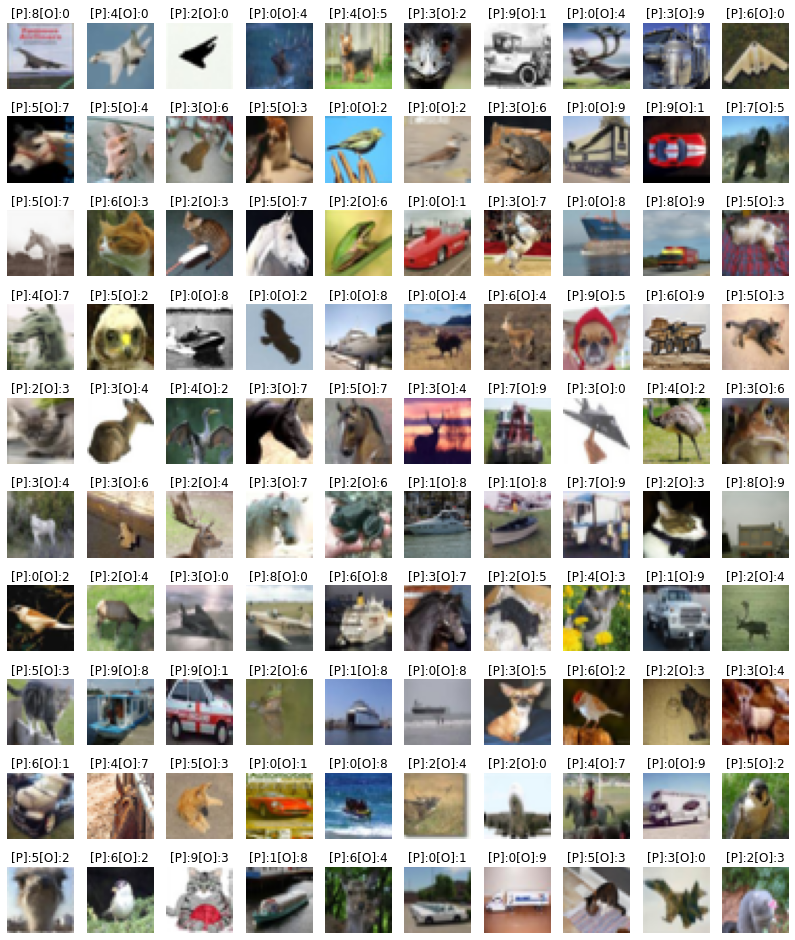

In [18]:
import numpy as np
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
# 預測錯誤的圖的原本標籤
orifalse = y_dim[diff]
# 預測錯誤的圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖的寬高
plt.figure(figsize=(14,450))
# 我們每一個列就是10個
width = 10
height = int(len(imgfalse)/10) + 1
for i, img in enumerate(imgfalse[0:100]):
  # (列數, 行數, 第幾張圖(i開始))
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
  plt.title(t)
  plt.imshow(img)
# trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗",
#       "青蛙", "馬," "船", "卡車"]